In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split


In [2]:
import pandas as pd
gender_submission = pd.read_csv("../input/titanic/gender_submission.csv")
test_data = pd.read_csv("../input/titanic/test.csv")
train_data = pd.read_csv("../input/titanic/train.csv")

In [3]:
y = train_data['Survived']
train_data.drop(columns = ['Survived'],inplace = True)

In [4]:
full_data = train_data.append(test_data)

In [5]:
full_data.drop(columns = ['Name','Age','SibSp','Parch','Ticket','Cabin','Embarked'],inplace = True)

In [6]:
full_data = pd.get_dummies(full_data,columns = ['Sex'])

In [7]:
full_data  = full_data.set_index('PassengerId').sort_index()

In [8]:
X = full_data.values[0:891]
X_to_test = full_data.values[891:]
y = y.values.ravel()

In [9]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_to_test = scaler.fit_transform(X_to_test)

>>> from sklearn import datasets, linear_model
>>> from sklearn.model_selection import cross_val_predict
>>> diabetes = datasets.load_diabetes()
>>> X = diabetes.data[:150]
>>> y = diabetes.target[:150]
>>> lasso = linear_model.Lasso()
>>> y_pred = cross_val_predict(lasso, X, y, cv=3)

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [11]:
lr_rate = [0.05,0.075,0.1,0.25,0.5,0.75]
train_acc = []
test_acc = []
for learning_rate in lr_rate:
    gb_clf = GradientBoostingClassifier(n_estimators = 20,learning_rate=learning_rate,max_features=2,max_depth=2)
    gb_clf.fit(X_train,y_train)
    train_acc.append(gb_clf.score(X_train,y_train))
    test_acc.append(gb_clf.score(X_test,y_test))
    
    

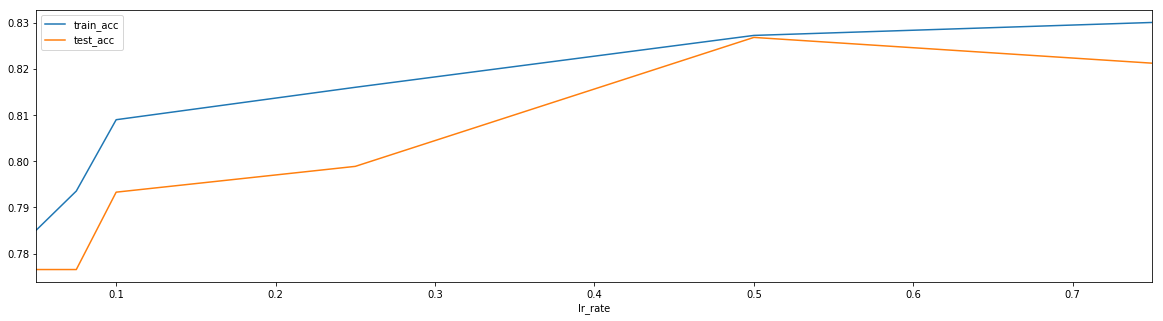

In [12]:
pd.DataFrame({'lr_rate':lr_rate,'train_acc':train_acc,'test_acc':test_acc}).set_index('lr_rate').plot(figsize = (20,5))
#learning rate 0.5 is good

In [13]:
gb_clf = GradientBoostingClassifier(n_estimators = 20,learning_rate = 0.5,max_features = 2,max_depth = 2)
gb_clf.fit(X_train,y_train)
pred = gb_clf.predict(X_test)

In [14]:
confusion_matrix(pred,y_test)

array([[100,  27],
       [  7,  45]])

In [15]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.93      0.79      0.85       127
           1       0.62      0.87      0.73        52

    accuracy                           0.81       179
   macro avg       0.78      0.83      0.79       179
weighted avg       0.84      0.81      0.82       179

